# 0.0 Imports

In [8]:
import pandas as pd 
import numpy as np
import warnings
from matplotlib import pyplot as plt
from sklearn import metrics as mt
from sklearn.linear_model import LogisticRegression

In [9]:
warnings.filterwarnings("ignore")

# 1.0 Load Dataset

In [10]:
#Data Path
data_path_X_trian = '../classificacao/X_training.csv'
data_path_y_trian = '../classificacao/y_training.csv'

data_path_X_val = '../classificacao/X_validation.csv'
data_path_y_val = '../classificacao/y_validation.csv'

data_path_X_test = '../classificacao/X_test.csv'
data_path_y_test = '../classificacao/y_test.csv'

# Train Dataset
X_train = pd.read_csv(data_path_X_trian)
y_train = pd.read_csv(data_path_y_trian)

# Validation Dataset
X_val = pd.read_csv(data_path_X_val)
y_val = pd.read_csv(data_path_y_val)

# Test Dataset
X_test = pd.read_csv(data_path_X_test)
y_test = pd.read_csv(data_path_y_test)

In [11]:
y_train = y_train.iloc[:, 0]
y_val = y_val.iloc[:, 0]
y_test = y_test.iloc[:, 0]

# 2.0 Performance

### Parameteres:
- `C`
- `solver`
- `max_iter`

## 2.1 Train Performance

In [13]:
# Model 
L_Regression = LogisticRegression( random_state= 42)
# Fit Model
L_Regression.fit( X_train, y_train )
# Predict
y_pred_train = L_Regression.predict( X_train )

# Performance Metrics
accuracy_train = mt.accuracy_score( y_train, y_pred_train )
precision_train = mt.precision_score( y_train, y_pred_train )
recall_train = mt.recall_score( y_train, y_pred_train )
f1_score_train = mt.f1_score( y_train, y_pred_train )

print('Train Accuracy: {}' .format( accuracy_train ))    
print('Train Precision: {}' .format(precision_train))    
print('Train Recall: {}' .format(recall_train))    
print('Train F1 Score: {}' .format(f1_score_train))    


Train Accuracy: 0.5666000137902503
Train Precision: 0.0
Train Recall: 0.0
Train F1 Score: 0.0


## 2.2 Validation Performance

In [15]:
# Model 
L_Regression = LogisticRegression( random_state= 42)
# Fit Model
L_Regression.fit( X_train, y_train )
# Predict
y_pred_val = L_Regression.predict( X_val )

# Performance Metrics
accuracy_val = mt.accuracy_score( y_val, y_pred_val )
precision_val = mt.precision_score( y_val, y_pred_val )
recall_val = mt.recall_score( y_val, y_pred_val )
f1_score_val = mt.f1_score( y_val, y_pred_val )

print('Validation Accuracy: {}' .format( accuracy_val ))    
print('Validation Precision: {}' .format(precision_val))    
print('Validation Recall: {}' .format(recall_val))
print('Validation F1 Score: {}' .format(f1_score_val))   

Validation Accuracy: 0.5666205476366678
Validation Precision: 0.0
Validation Recall: 0.0
Validation F1 Score: 0.0


## 2.3 Fine Tunning

### `C`

In [16]:
C = np.arange(0.1, 2.01, 0.01)

accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []

In [17]:
for i in C:
    # Model 
    L_Regression = LogisticRegression(C=i, random_state= 42)
    # Fit Model
    L_Regression.fit( X_train, y_train )
    # Predict
    y_pred = L_Regression.predict( X_val )

    # Performance Metrics
    accuracy = mt.accuracy_score( y_val, y_pred )
    precision = mt.precision_score( y_val, y_pred )
    recall= mt.recall_score( y_val, y_pred )
    f1_score = mt.f1_score( y_val, y_pred )

    # List
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_score_list.append(f1_score) 

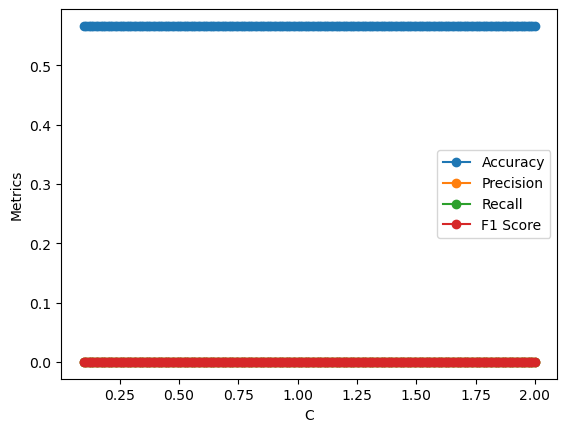

In [18]:
plt.plot( C, accuracy_list, marker='o', label ='Accuracy' )
plt.plot( C, precision_list, marker='o', label ='Precision' )
plt.plot( C, recall_list, marker='o', label ='Recall' )
plt.plot( C, f1_score_list, marker='o', label ='F1 Score' )
plt.xlabel('C')
plt.ylabel('Metrics')
plt.legend()

In [19]:
best_C = C[np.argmax(accuracy_list)]
best_C

0.1

### `solver`

In [25]:
solver = ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]

accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []

In [26]:
for i in solver:
    # Model 
    L_Regression = LogisticRegression(solver=i, C=best_C, random_state= 42)
    # Fit Model
    L_Regression.fit( X_train, y_train )
    # Predict
    y_pred = L_Regression.predict( X_val )

    # Performance Metrics
    accuracy = mt.accuracy_score( y_val, y_pred )
    precision = mt.precision_score( y_val, y_pred )
    recall= mt.recall_score( y_val, y_pred )
    f1_score = mt.f1_score( y_val, y_pred )

    # List
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_score_list.append(f1_score) 

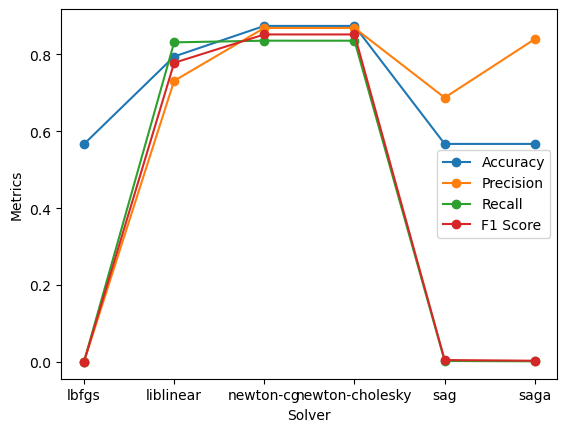

In [27]:
plt.plot(solver, accuracy_list, marker='o', label='Accuracy')
plt.plot(solver, precision_list, marker='o', label='Precision')
plt.plot(solver, recall_list, marker='o', label='Recall')
plt.plot(solver, f1_score_list, marker='o', label='F1 Score')
plt.xlabel('Solver')
plt.ylabel('Metrics')
plt.legend()

In [28]:
best_solver = solver[np.argmax(accuracy_list)]
best_solver

'newton-cg'

### `max_iter`

In [29]:
max_iter = np.arange(100, 5000, 100)

accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []

In [30]:
for i in max_iter:
    # Model 
    L_Regression = LogisticRegression(max_iter=i, solver=best_solver, C=best_C, random_state= 42)
    # Fit Model
    L_Regression.fit( X_train, y_train )
    # Predict
    y_pred = L_Regression.predict( X_val )

    # Performance Metrics
    accuracy = mt.accuracy_score( y_val, y_pred )
    precision = mt.precision_score( y_val, y_pred )
    recall= mt.recall_score( y_val, y_pred )
    f1_score = mt.f1_score( y_val, y_pred )

    # List
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_score_list.append(f1_score) 

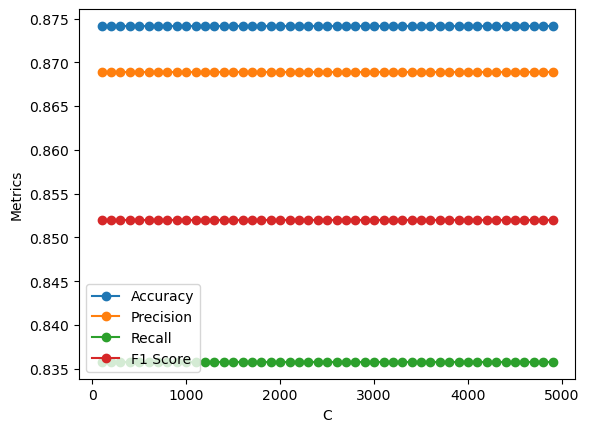

In [32]:
plt.plot(max_iter, accuracy_list, marker="o", label="Accuracy")
plt.plot(max_iter, precision_list, marker="o", label="Precision")
plt.plot(max_iter, recall_list, marker="o", label="Recall")
plt.plot(max_iter, f1_score_list, marker="o", label="F1 Score")
plt.xlabel("C")
plt.ylabel("Metrics")
plt.legend()

In [33]:
best_max_iter = max_iter[np.argmax(accuracy_list)]
best_max_iter

100

## 2.4 Test Performance

In [35]:
# Model 
L_Regression = LogisticRegression(max_iter=best_max_iter, solver=best_solver, C=best_C, random_state= 42)
# Fit Model
L_Regression.fit(pd.concat([X_train, X_val],axis=0),pd.concat([y_train, y_val],axis=0))
# Predict
y_pred_test = L_Regression.predict( X_test )

# Performance Metrics
accuracy_test = mt.accuracy_score( y_test, y_pred_test )
precision_test = mt.precision_score( y_test, y_pred_test )
recall_test= mt.recall_score( y_test, y_pred_test )
f1_score_test = mt.f1_score( y_test, y_pred_test )

print('Test Accuracy: {}' .format( accuracy_test ))    
print('Test Precision: {}' .format(precision_test))    
print('Test Recall: {}' .format(recall_test))
print('Test F1 Score: {}' .format(f1_score_test))

Test Accuracy: 0.871316572046499
Test Precision: 0.8673068129858253
Test Recall: 0.8344918609766828
Test F1 Score: 0.8505829596412556


# 3.0 Results

In [ ]:
train_metrics = {
    "Algorithm": "Logistic Regression",
    "Accuracy": np.round(accuracy_train, 3),
    "Precision": np.round(precision_train, 3),
    "Recall": np.round(recall_train, 3),
    "F1 Score": np.round(f1_score_train, 3),
}
validation_metrics = {
    "Algorithm": "Logistic Regression",
    "Accuracy": np.round(accuracy_val, 3),
    "Precision": np.round(precision_val, 3),
    "Recall": np.round(recall_val, 3),
    "F1 Score": np.round(f1_score_val, 3),
}
test_metrics = {
    "Algorithm": "Logistic Regression",
    "Accuracy": np.round(accuracy_test, 3),
    "Precision": np.round(precision_test, 3),
    "Recall": np.round(recall_test, 3),
    "F1 Score": np.round(f1_score_test, 3),
}

pd.DataFrame(train_metrics, index=[0]).to_csv(
    "./train_metrics.csv", mode="a", header=False
)
pd.DataFrame(validation_metrics, index=[0]).to_csv(
    "./validation_metrics.csv", mode="a", header=False
)
pd.DataFrame(test_metrics, index=[0]).to_csv(
    "./test_metrics.csv", mode="a", header=False
)